# Discrete time birth death process with self replication
Simulates a simple. discrete time stochastic model of a self replicating object, i.e.
```
A -> A + A  # division
A -> 0      # death
```
In addition, objects can mutate, i.e. `A->B`, and B replicates with the same rules.

**Examples**:
- cellular growth
- PCR amplification



In [2]:
import pandas as pd
import numpy as np
from birthdeathpy import simulation as sim
from birthdeathpy.cli import timecourse_to_dataframe
import seaborn as sns
import matplotlib.pyplot as plt

## Create some initial condition
5 clones, each with one cell. Its just a dictionary of clone frequencies

In [3]:
n_clones = 5
abundance = 1
initial_seq_freq = {
        sim.create_random_sequence(length=20): abundance for _ in range(n_clones)
    }
initial_seq_freq

{'ATAAGTAGATTCGGTGCTCT': 1,
 'GCTCAGATAGCGTCGGCTTC': 1,
 'TGTCCCGAGTGCGCAGGCGT': 1,
 'GATCGTAAAGGACGTCGGCC': 1,
 'TAGCGTACGATTCTCGTACG': 1}

## Simulate the population
- 20 rounds of division
- no mutations
- 1/3 chance of a single cell dying per round

In [4]:
timecourse = sim.PCR_amplification_with_errors(
    initial_seq_freq,
    rounds=20,
    per_base_error_rate=0,  # no mutations
    prob_death = 0.3)

Final:	7.284e+03 molecules total, 4 subclones


Returns a list of dictionaries (of clonesizes).

In [5]:
timecourse[0]  # the initial condition

{'ATAAGTAGATTCGGTGCTCT': 1,
 'GCTCAGATAGCGTCGGCTTC': 1,
 'TGTCCCGAGTGCGCAGGCGT': 1,
 'GATCGTAAAGGACGTCGGCC': 1,
 'TAGCGTACGATTCTCGTACG': 1}

In [6]:
timecourse[20]  # final clonesizes after 20 rounds

defaultdict(int,
            {'ATAAGTAGATTCGGTGCTCT': 2132,
             'GCTCAGATAGCGTCGGCTTC': 1772,
             'GATCGTAAAGGACGTCGGCC': 726,
             'TAGCGTACGATTCTCGTACG': 2654})

turn the timecourse into a dataframe, easier plotting

In [7]:
df = timecourse_to_dataframe(timecourse)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
ATAAGTAGATTCGGTGCTCT,1,2,4,8,10,12,18,24,34,46,...,100,146,192,268,434,600,790,1118,1506,2132
GCTCAGATAGCGTCGGCTTC,1,2,4,6,6,12,18,22,30,34,...,78,116,162,228,306,432,610,904,1266,1772
TGTCCCGAGTGCGCAGGCGT,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GATCGTAAAGGACGTCGGCC,1,2,4,2,4,4,8,6,6,10,...,28,42,64,78,120,166,238,350,492,726
TAGCGTACGATTCTCGTACG,1,2,2,4,6,10,18,30,44,52,...,128,192,262,362,510,688,968,1354,1894,2654


# Some more cells

In [8]:
n_clones = 1000
initial_seq_freq = {
        sim.create_random_sequence(length=20): 1 for _ in range(n_clones)
    }

timecourse = sim.PCR_amplification_with_errors(
     initial_seq_freq,
     rounds=20,
     per_base_error_rate=0,  # no mutations
     prob_death = 0.3)
df = timecourse_to_dataframe(timecourse)

Final:	7.431e+05 molecules total, 525 subclones


In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
CACGTCCAGCCCCCAGCGGC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATAAGGATGAAAGGTCTTAG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AATATGTATGCGAGGATCCA,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCGCGTTTGATCCTTTATAA,1,2,4,8,10,14,22,34,46,58,...,114,158,230,342,468,632,898,1224,1686,2362
GGATTCTTAATCATGGTCAG,1,2,2,4,6,10,16,22,30,42,...,86,144,206,280,416,572,800,1106,1524,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATTCGCCCATAACATCAAAA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CGTTCGAAGTTCAATACGAA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCTAGGAGAAAGCGATGTCG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CGATCGCATACACCCGTGAA,1,2,4,6,8,10,14,18,20,30,...,76,102,128,176,252,332,482,668,902,1266


<AxesSubplot:xlabel='20', ylabel='Density'>

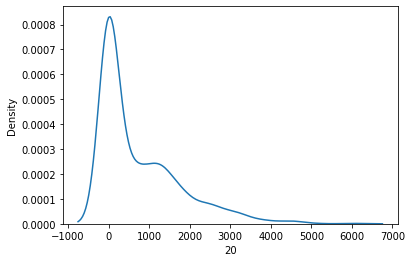

In [10]:
sns.kdeplot(df[20])

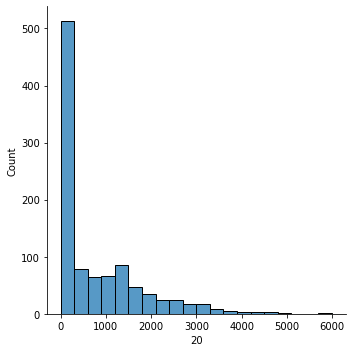

In [11]:
sns.displot(df[20], bins=20)

Clonesized over time

Text(0, 0.5, 'Clone abundance')

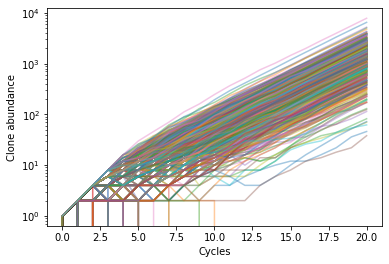

In [7]:
plt.plot(df.T, alpha=0.4)
plt.yscale('log')
plt.xlabel('Cycles')
plt.ylabel('Clone abundance')

# The death rate controls the scewness

Final:	9.271e+05 molecules total, 990 subclones
Final:	5.811e+05 molecules total, 940 subclones
Final:	3.635e+05 molecules total, 889 subclones
Final:	2.319e+05 molecules total, 850 subclones
Final:	1.364e+05 molecules total, 794 subclones
Final:	7.468e+04 molecules total, 711 subclones
Final:	4.221e+04 molecules total, 621 subclones
Final:	2.474e+04 molecules total, 539 subclones
Final:	1.237e+04 molecules total, 447 subclones
Final:	5.334e+03 molecules total, 308 subclones
Final:	2.694e+03 molecules total, 236 subclones
Final:	1.100e+03 molecules total, 148 subclones


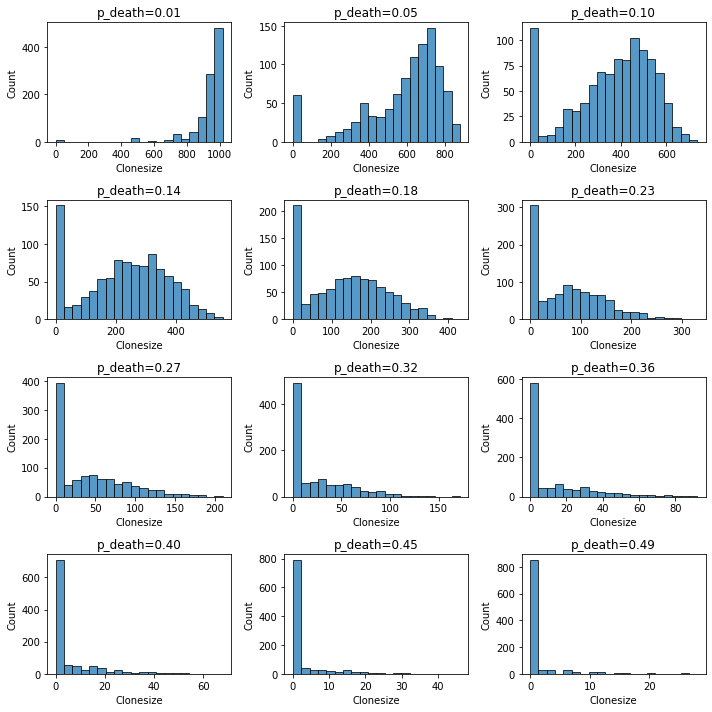

In [56]:
d_range = np.linspace(0.01,0.49, 12)
plt.figure(figsize=(10,10))
Q = []
for i, d in enumerate(d_range):
    timecourse = sim.PCR_amplification_with_errors(
        initial_seq_freq,
        rounds=10,
        per_base_error_rate=0,  # no mutations
        prob_death = d)
    df = timecourse_to_dataframe(timecourse)
    
    plt.subplot(4,3, i+1)
    sns.histplot(df[10], bins=20)
    plt.title(f'p_death={d:.2f}')
    plt.xlabel('Clonesize')
#     s = df[[20]]
#     s['p_death'] = d
#     Q.append(s)
# Q =pd.concat(Q)
plt.tight_layout()

In [ ]:
for 